<a href="https://colab.research.google.com/github/KevinSolano22/Control/blob/main/Copia_de_DCS_RC_Circuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Circuito RC**

$$\frac{dV_c(t)}{dt}=-\frac{1}{RC}V_c(t)+\frac{1}{RC}V_s(t)$$

range(0, 101)
range(0, 101)
range(0, 101)
range(0, 101)
range(0, 101)


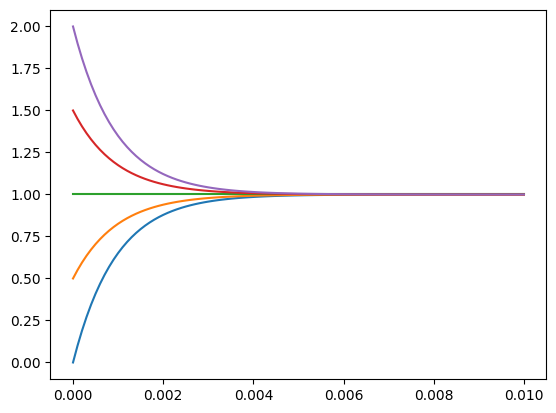

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

R,C = 1e3,1e-6
tau = R*C
vc0 = 2
dt = tau/10
t_final  =10*tau


for vc_current in [0,.5,1,1.5,2]:
  vct = [vc_current]
  t = [0]
  for i in range(int(t_final/dt)):
    vc_next = vc_current + dt*(-vc_current/R/C+1/R/C)
    vct.append(vc_next)
    t.append(dt*(i+1))

    vc_current = vc_next
  # print(t)
  # print(vct)

  plt.plot(t,vct)
  print(range(int(t_final/dt+1)))




**Mètodo de Euler**

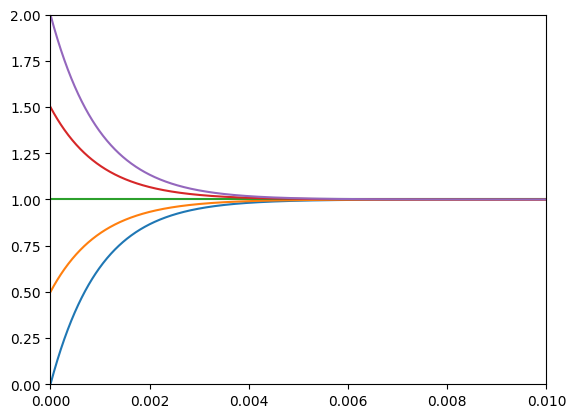

In [ ]:
#Método de Euler

def RC_ivp(t,vc,R,C,U):
  dvc =-vc/R/C+U/R/C
  return dvc

def solve_ivp_euler(f,tspan,x0,h,R,C,U):
  x = [x0]
  t = [tspan[0]]
  x_current = x0
  for i in range(int((tspan[-1]-tspan[0])/h)):
    x_next = x_current + h*f(h*i,x_current,R,C,U)
    x.append(x_next)
    t.append(h*(i+1))
    x_current = x_next
  return [t,x]

R,C,U =  1e3, 1e-6, 1
tau = R*C
h = tau/100
tend = 10*tau

for vc0 in [0,.5,1,1.5,2]:
  [t,vc] = solve_ivp_euler(RC_ivp,[0,tend],vc0,h,R,C,U)
  plt.plot(t,vc)
  plt.axis([0,tend,0,2])


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.998e-06  2.198e-05  2.218e-04  1.009e-03
             1.973e-03  3.126e-03  4.506e-03  6.211e-03  8.400e-03
             1.000e-02]
        y: [[ 0.000e+00  1.996e-03 ...  9.996e-01  9.999e-01]
            [ 5.000e-01  5.010e-01 ...  9.998e-01  1.000e+00]
            ...
            [ 1.500e+00  1.499e+00 ...  1.000e+00  1.000e+00]
            [ 2.000e+00  1.998e+00 ...  1.000e+00  1.000e+00]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fe228cdeda0>
 t_events: None
 y_events: None
     nfev: 62
     njev: 0
      nlu: 0


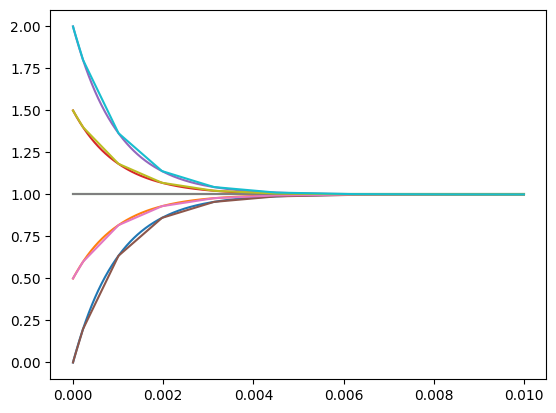

In [ ]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

def RC_ivp(t,vc,R,C,U):
  return dvc -vc/R/C+U/R/C

R,C,U =  1e3, 1e-6, 1
tau = R*C
tend = 10*tau

sol = solve_ivp(RC_ivp,[0,tend],[0,.5,1,1.5,2],args=(R,C,U),dense_output=True)

t = np.linspace(0, tend, 1001)
x = sol.sol(t)

plt.plot(t, x.T)
plt.plot(sol.t, sol.y.T)

print(sol)

In [ ]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 7.4 MB/s eta 0:00:00


0
1
2
0.5
1.5


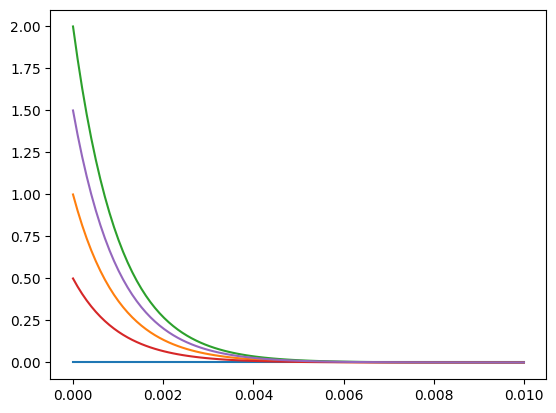

In [ ]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt


R,C,U =  1e3, 1e-6, 1
tau = R*C
tend = 10*tau

RC_sys = ct.ss([-1/tau],[1/tau],[1],[0])
for x0 in [0,1,2,0.5,1.5]:
   [t, x] = ct.initial_response(RC_sys,tend,x0)
   print(x0)
   plt.plot(t, x)


0
1
2
0.5
1.5


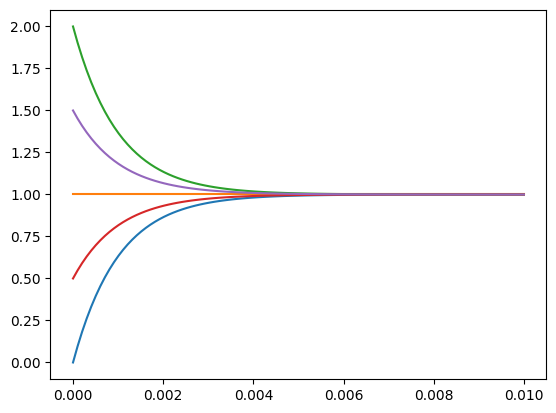

In [ ]:
for x0 in [0,1,2,0.5,1.5]:
   [t, x] = ct.step_response(RC_sys,tend,x0)
   print(x0)
   plt.plot(t, x)

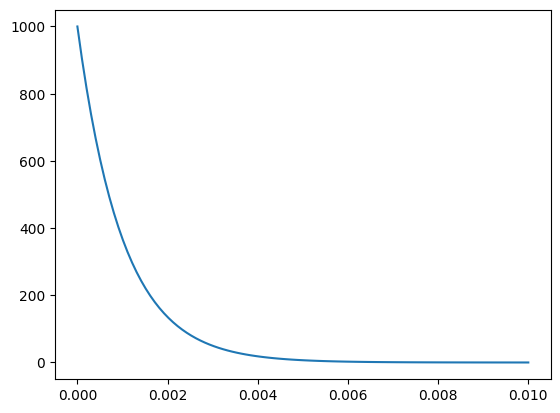

In [ ]:
[t, x] = ct.impulse_response(RC_sys,tend)
plt.plot(t, x)

In [ ]:
from sympy.interactive.printing import init_printing
init_printing(use_unicode=False, wrap_line=False,use_latex=True)

from sympy import  Symbol
from sympy.matrices import Matrix

R = Symbol('R', positive = True)
C = Symbol('C', positive = True)

A=Matrix([-1/R/C]);(A)

[-1 ]
[---]
[C*R]

In [ ]:
from sympy.integrals.transforms import inverse_laplace_transform
from sympy.abc import s, t
from sympy.matrices import Matrix, eye

eAt = inverse_laplace_transform(Matrix(s*eye(1)-A).inv(),s,t); eAt


[ -t              ]
[ ---             ]
[ C*R             ]
[e   *Heaviside(t)]

In [ ]:
B = Matrix([1/R/C]);B

ceAtBu = inverse_laplace_transform(Matrix(s*eye(1)-A).inv()*B/s,s,t); ceAtBu

[                        -t              ]
[                        ---             ]
[                        C*R             ]
[C*R*Heaviside(t) - C*R*e   *Heaviside(t)]
[----------------------------------------]
[                  C*R                   ]

In [ ]:
from sympy import trigsimp, powsimp, expand, factor, simplify
(simplify(trigsimp(powsimp(expand(ceAtBu)))))

[                -t              ]
[                ---             ]
[                C*R             ]
[Heaviside(t) - e   *Heaviside(t)]

In [ ]:
from sympy import simplify
simplify(ceAtBu)

[                -t              ]
[                ---             ]
[                C*R             ]
[Heaviside(t) - e   *Heaviside(t)]

In [ ]:
eAt.evalf(subs={R: 1e3, C:1e-6})

[ -1000.0*t             ]
[e         *Heaviside(t)]